## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

<font color="brown">

Un arbre de décision est composé de noeuds qui ont deux noeuds enfant à chaque fois, sauf le noeud terminal qui permet de prendre la décision. 

Chaque noeud permet de prendre une décision sur une feature (par exemple est-ce que la valeur de x1 est > ou < à 10), au bout de toutes les décisions on abouti à une prédiction sur y au  noeud terminal. 

</font>

In [2]:
# Import the decision tree exemple and make it run 
from sklearn.datasets import load_iris

In [3]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [4]:
# Train a decision tree with max_depth=2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_norm = scaler.fit_transform(X)

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_norm, y)


DecisionTreeClassifier(max_depth=2)

### Visualization: export_graphviz

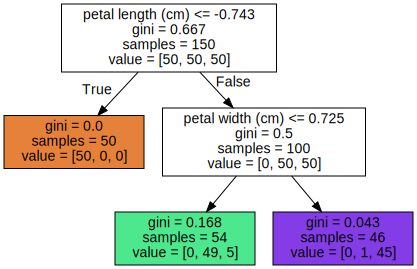

In [5]:
# Visualize decision tree using graphviz 
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf, out_file=None,feature_names=iris.feature_names[2:],filled=True)

graph = graphviz.Source(dot_data, filename="iris_tree", format='png')
graph


In [6]:
graph.render(filename='../plot/iris_tree')

'../plot/iris_tree.png'

In [7]:
# open image with PIL
from PIL import Image
image = Image.open("../plot/iris_tree.png")
image.show()

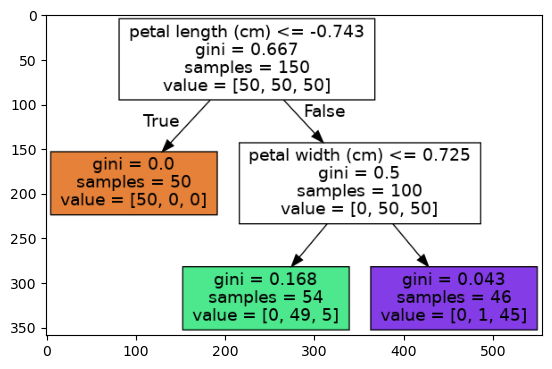

In [8]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('../plot/iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

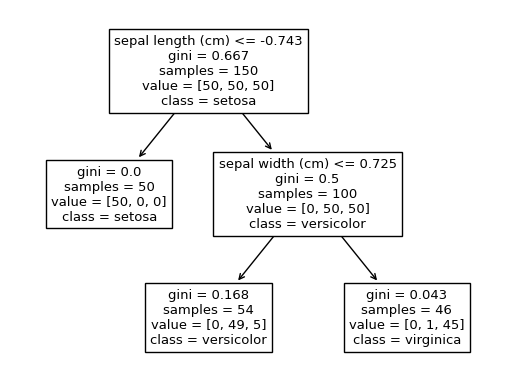

In [9]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree

plot = plot_tree(tree_clf, feature_names = iris.feature_names[:2], class_names = iris.target_names)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


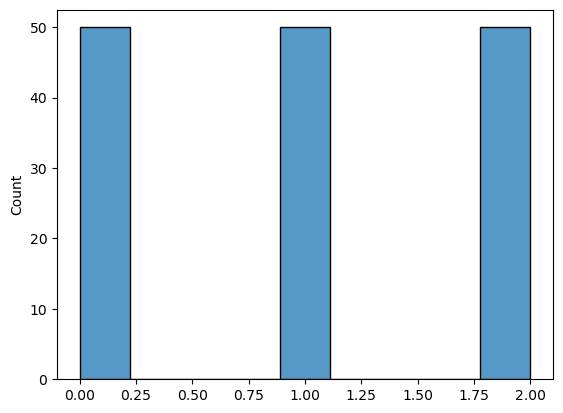

In [10]:
import seaborn as sns
sns.histplot(y)
plt.show()

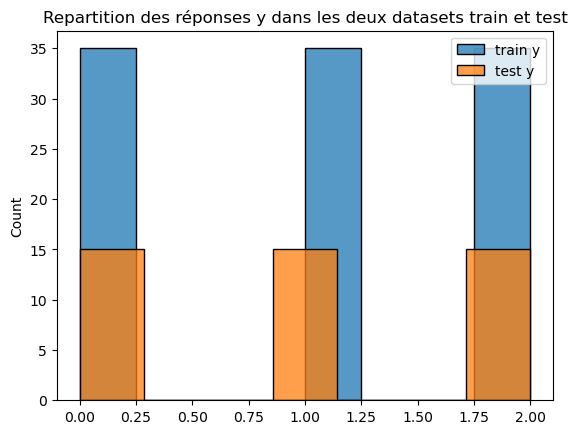

In [11]:
# split in train and test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42, stratify=y)

sns.histplot(y_train, label='train y')
sns.histplot(y_test, label="test y")
plt.legend()
plt.title('Repartition des réponses y dans les deux datasets train et test')
plt.show()

In [39]:
# fit classifier with max_depth=2
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [40]:
# make predictions on the test set
y_predicted = tree_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Print Accuracy
print("Accuracy :", accuracy_score(y_true=y_test, y_pred=y_predicted))
# Print Confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_true=y_test, y_pred=y_predicted))
# Print Precision
print('Precision :', precision_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
# Print Recall
print("Recall :", recall_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
# Print F1-score
print("F1-score" , f1_score(y_true=y_test, y_pred=y_predicted, average='weighted'))

# pd.DataFrame(
#     {
#         'Accuracy' : accuracy_score(y_true=y_test, y_pred=y_predicted), 
#         'Precision' : precision_score(y_true=y_test, y_pred=y_predicted, average='weighted'), 
#         "Recall" : recall_score(y_true=y_test, y_pred=y_predicted, average='weighted'), 
#         'F1-score' : f1_score(y_true=y_test, y_pred=y_predicted, average='weighted')
#     }
# )


Accuracy : 0.8888888888888888
Confusion matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]
Precision : 0.8898809523809523
Recall : 0.8888888888888888
F1-score 0.888765294771969


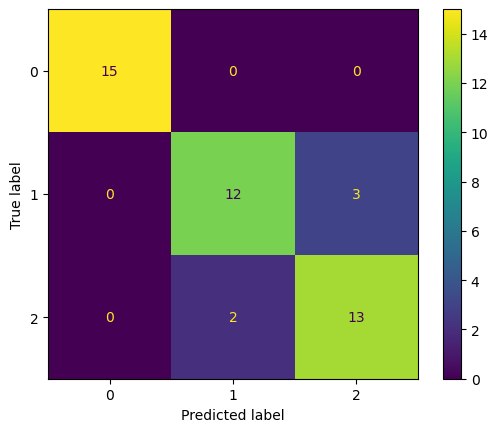

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_predicted)).plot()

## Random forests

Explain here how they work in your own words:

<font color="brown">
Les forêt aléatoires sont une moyenne d'une prédiction ou la prédiction majoritaire (pour une régression et une classification, respectivement) de plusieurs arbres de décision. 
On choisit un nombre d'arbres dans la forêt au préalable.
Cette méthode permet de palier aux défauts de faire un arbre de décision unique.
</font>

In [43]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [44]:
# make predictions on the test set
y_predicted = forest_clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Print Accuracy
print("Accuracy :", accuracy_score(y_true=y_test, y_pred=y_predicted))
# Print Confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_true=y_test, y_pred=y_predicted))
# Print Precision
print('Precision :', precision_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
# Print Recall
print("Recall :", recall_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
# Print F1-score
print("F1-score" , f1_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_predicted)).plot()

Accuracy : 0.9111111111111111
Confusion matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Precision : 0.9155354449472096
Recall : 0.9111111111111111
F1-score 0.9107142857142857


## SVM

Explain here how they work in your own words:

Le SVM permet de classer des données entre deux catégories en traçant une ligne entre les deux, on choisit les marges autour de ces lignes au préalable. Le SVM permet aussi de résoudre des problèmes de régression. 

In [6]:
# Book example SVM: iris dataset


In [47]:
# fit a linear SVM classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', max_iter=1000)
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [48]:
# make predictions on the test set
y_predicted = sgd_clf.predict(X_test)

Accuracy : 0.8888888888888888
Confusion matrix:
 [[15  0  0]
 [ 2 13  0]
 [ 0  3 12]]
Precision : 0.8982843137254902
Recall : 0.8888888888888888
F1-score 0.8883661887694145


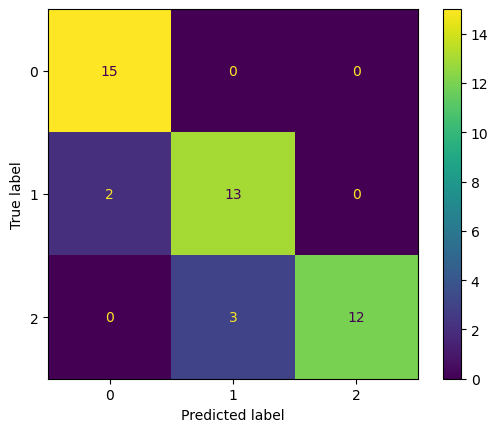

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Print Accuracy
print("Accuracy :", accuracy_score(y_true=y_test, y_pred=y_predicted))
# Print Confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_true=y_test, y_pred=y_predicted))
# Print Precision
print('Precision :', precision_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
# Print Recall
print("Recall :", recall_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
# Print F1-score
print("F1-score" , f1_score(y_true=y_test, y_pred=y_predicted, average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_predicted)).plot()
plt.show()

## Learning curves

### Book example

In [154]:
# Book Dataset
df_heart = pd.read_csv("../data/heart.csv")
df_heart

X = df_heart.drop(columns='target')
y = df_heart['target']




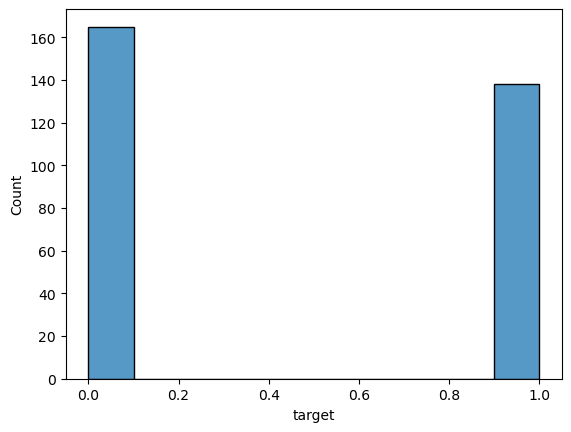

In [155]:
sns.histplot(y)
plt.show()

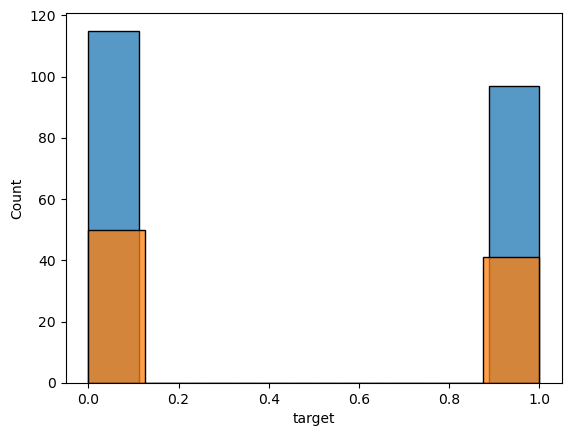

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #il faut stratify car imbalanced

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sns.histplot(y_train, label='training y')
sns.histplot(y_test, label='test y')

plt.show()

In [157]:
X_test

array([[-0.60329775,  0.66496381,  1.03881981, ...,  0.99993991,
         2.40578076, -0.55639734],
       [ 0.28720963, -1.50384124, -0.92751769, ...,  0.99993991,
         0.34090011, -0.55639734],
       [ 0.39852305, -1.50384124, -0.92751769, ..., -0.64337219,
        -0.69154022, -0.55639734],
       ...,
       [ 0.73246332,  0.66496381, -0.92751769, ...,  0.99993991,
         0.34090011,  1.15311332],
       [-1.49380513,  0.66496381,  1.03881981, ..., -0.64337219,
        -0.69154022, -0.55639734],
       [-1.93905881,  0.66496381,  1.03881981, ..., -2.2866843 ,
        -0.69154022, -0.55639734]])

In [158]:
# Implement the book’s code on learning curves on the data he has used.
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
forest_clf.fit(X_train, y_train)
# y_predicted = forest_clf.predict(X_test)

train_size_abs, train_scores, test_scores = learning_curve(forest_clf, X_train, y_train, train_sizes=[2, 10, 20, 30, 40, 50, 60, 70, 80], 
                                                           cv=5, scoring='accuracy')

In [159]:
train_size_abs

array([ 2, 10, 20, 30, 40, 50, 60, 70, 80])

In [160]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.95      , 0.95      , 0.95      , 0.95      ],
       [0.9       , 0.9       , 0.9       , 0.9       , 0.9       ],
       [0.925     , 0.875     , 0.875     , 0.875     , 0.875     ],
       [0.94      , 0.9       , 0.9       , 0.9       , 0.9       ],
       [0.91666667, 0.85      , 0.88333333, 0.88333333, 0.88333333],
       [0.91428571, 0.87142857, 0.87142857, 0.87142857, 0.87142857],
       [0.9       , 0.8375    , 0.875     , 0.8625    , 0.8625    ]])

In [161]:
test_scores

array([[0.69767442, 0.53488372, 0.54761905, 0.54761905, 0.54761905],
       [0.65116279, 0.60465116, 0.64285714, 0.73809524, 0.71428571],
       [0.6744186 , 0.72093023, 0.69047619, 0.85714286, 0.83333333],
       [0.81395349, 0.8372093 , 0.76190476, 0.85714286, 0.83333333],
       [0.79069767, 0.76744186, 0.71428571, 0.78571429, 0.83333333],
       [0.74418605, 0.76744186, 0.73809524, 0.76190476, 0.85714286],
       [0.76744186, 0.81395349, 0.76190476, 0.78571429, 0.80952381],
       [0.74418605, 0.88372093, 0.78571429, 0.80952381, 0.88095238],
       [0.72093023, 0.81395349, 0.83333333, 0.83333333, 0.83333333]])

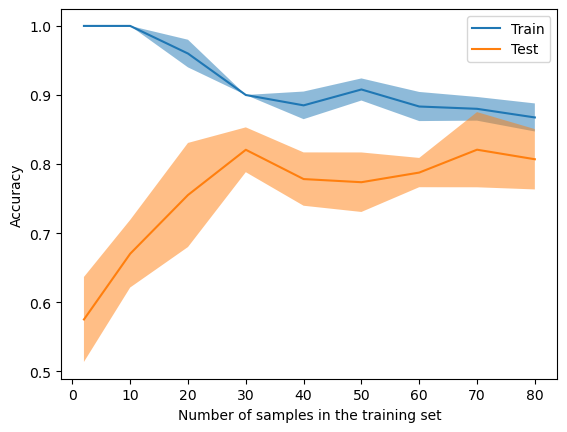

In [163]:
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name='Accuracy')
display.plot()
plt.show()

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [8]:
forest_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
forest_clf.fit(X_train, y_train)
sizes = [2, 10, 20, 30, 40, 50, 60, 70, 80, 100, 200]
train_size_abs, train_scores, test_scores = learning_curve(forest_clf, X_train, y_train, train_sizes=sizes, 
                                                           cv=5, scoring='accuracy')
LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
plt.show()

NameError: name 'learning_curve' is not defined

212

In [173]:
# forest_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
# forest_clf.fit(X_train, y_train)
# # sizes = np.linspace(start=0.1, stop=1.0, num=len(X_train),  dtype='float')
# sizes = [i for i in range(2,len(X_train),1)]
# train_size_abs, train_scores, test_scores = learning_curve(forest_clf, X_train, y_train, train_sizes=sizes, 
#                                                            cv=5, scoring='accuracy')
# LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
# plt.show()

ValueError: train_sizes has been interpreted as absolute numbers of training samples and must be within (0, 169], but is within [2, 211].

array([  2,   6,  10,  14,  19,  23,  27,  32,  36,  40,  44,  49,  53,
        57,  62,  66,  70,  74,  79,  83,  87,  92,  96, 100, 104, 109,
       113, 117, 122, 126, 130, 134, 139, 143, 147, 152, 156, 160, 164,
       169, 173, 177, 182, 186, 190, 194, 199, 203, 207, 212])

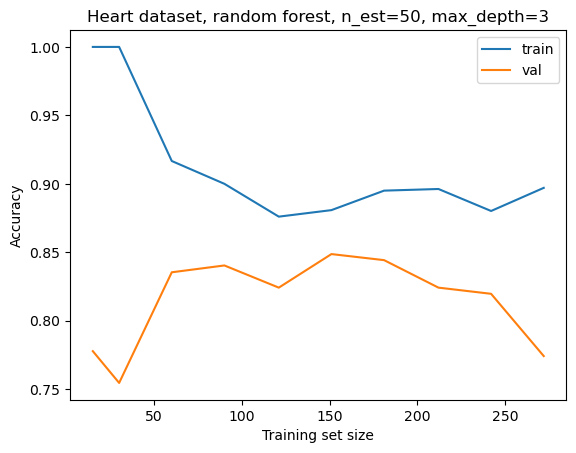

In [17]:
# # Method that plots learning curves for a given estimator and training_set_sizes
# def plotting_learning_curve(estimator, X, y, training_set_sizes):
#    pass

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

df_heart = pd.read_csv("../data/heart.csv")


X = df_heart.drop(columns='target')
y = df_heart['target']


df_temp=pd.DataFrame({
      "Training_set_size" : [],
      'cv' : [],
      'val' : []
   })

for train_set_size in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
   x_axis=[]
   y_train_axis=[]
   y_test_axis=[]
   forest_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
   X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_set_size, random_state=42, stratify=y) #il faut stratify car imbalanced
   scaler=StandardScaler()
   X_train = scaler.fit_transform(X_train)
   X_test = scaler.transform(X_test)
   forest_clf.fit(X_train, y_train)
   y_train_score=forest_clf.predict(X_train)
   y_predicted = forest_clf.predict(X_test)
   # print(len(X_train))
   # print(len(X_test))
   # print(accuracy_score(y_true=y_test, y_pred=y_predicted)) #accuracy pour test set
   # print(cross_validate(forest_clf, X_train, y_train, scoring='accuracy')['test_score'].mean())

   x_axis.append(len(X_train))

   # cross_val_score = cross_validate(forest_clf, X_train, y_train, scoring='accuracy')['test_score'].mean()
   train_score = accuracy_score(y_true=y_train, y_pred=y_train_score)
   pred_score = accuracy_score(y_true=y_test, y_pred=y_predicted)

   y_train_axis.append(train_score)
   y_test_axis.append(pred_score)

   new_row = pd.DataFrame({
      "Training_set_size" : x_axis,
      'cv' : y_train_axis,
      'val' : y_test_axis
   })

   df_temp=pd.concat([df_temp, new_row], axis=0)

df_temp

sns.lineplot(data=df_temp, x='Training_set_size', y="cv", label='train')
sns.lineplot(data=df_temp, x='Training_set_size', y='val', label='val')

plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Heart dataset, random forest, n_est=50, max_depth=3")
plt.show()




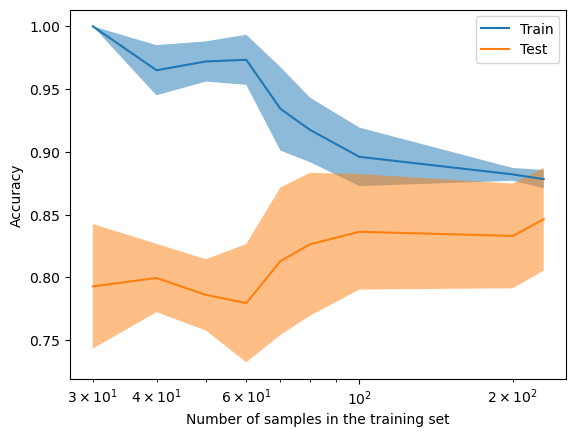

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

df_heart = pd.read_csv("../data/heart.csv")


X = df_heart.drop(columns='target')
y = df_heart['target']

scaler=StandardScaler()
X_norm = scaler.fit_transform(X)

forest_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
forest_clf.fit(X_norm, y)
sizes = [30, 40, 50, 60, 70, 80, 100, 200, 230]
train_size_abs, train_scores, test_scores = learning_curve(forest_clf, X_train, y_train, train_sizes=sizes, 
                                                           cv=5, scoring='accuracy')
LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
plt.show()


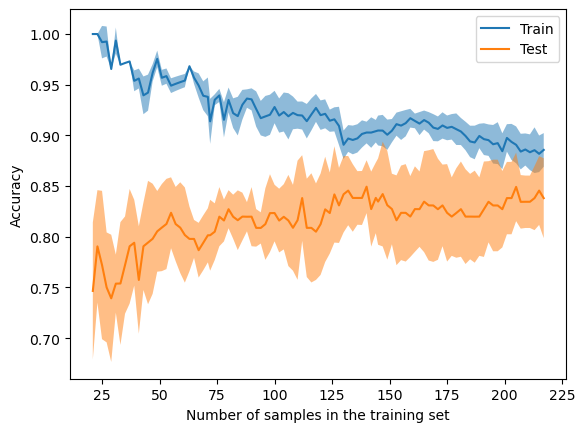

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

df_heart = pd.read_csv("../data/heart.csv")


X = df_heart.drop(columns='target')
y = df_heart['target']

scaler=StandardScaler()
X_norm = scaler.fit_transform(X)

forest_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
forest_clf.fit(X_norm, y)
sizes = np.linspace(0.1,1.0,100)
train_size_abs, train_scores, test_scores = learning_curve(forest_clf, X_train, y_train, train_sizes=sizes, 
                                                           cv=5, scoring='accuracy')
LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
plt.show()


## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

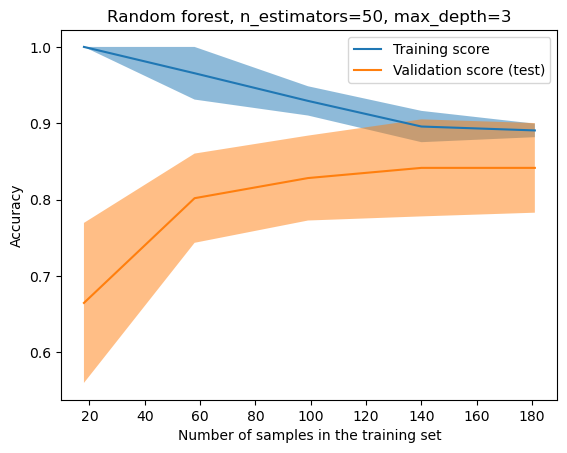

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    scaler=StandardScaler()
    X_norm = scaler.fit_transform(X)
    estimator.fit(X_norm, y)
    train_size_abs, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, 
                                                            cv=cv, scoring='accuracy', n_jobs=n_jobs)
    LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
    plt.legend(['Training score', 'Validation score (test)'])
    plt.title(title)
    plt.ylim(ylim)
    plt.show()

df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
forest_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
plot_learning_curve(forest_clf, "Random forest, n_estimators=50, max_depth=3", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

## Decision trees learning curves

In [5]:
# import the dataset you want
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    scaler=StandardScaler()
    X_norm = scaler.fit_transform(X)
    estimator.fit(X_norm, y)
    train_size_abs, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, 
                                                            cv=cv, scoring='accuracy', n_jobs=n_jobs)
    LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
    plt.legend(['Training score', 'Validation score (test)'])
    plt.title(title)
    plt.ylim(ylim)
    plt.show()


df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
# tree_clf=DecisionTreeClassifier(max_depth=2)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
# plot_learning_curve(tree_clf, "Decision tree, max_depth=2", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

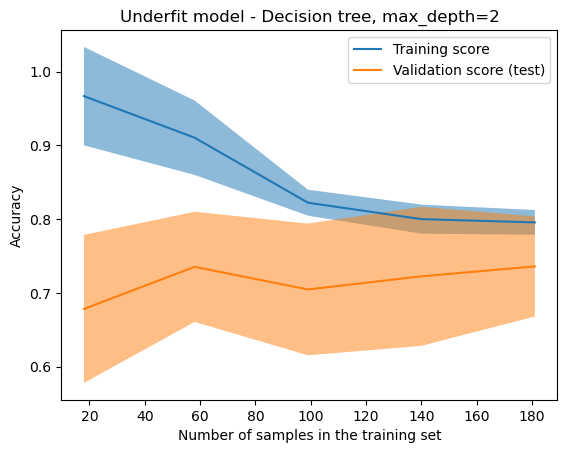

In [6]:
# Underfit model
# Train a decision tree with max_depth=2

tree_clf=DecisionTreeClassifier(max_depth=2)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
plot_learning_curve(tree_clf, "Underfit model - Decision tree, max_depth=2", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))


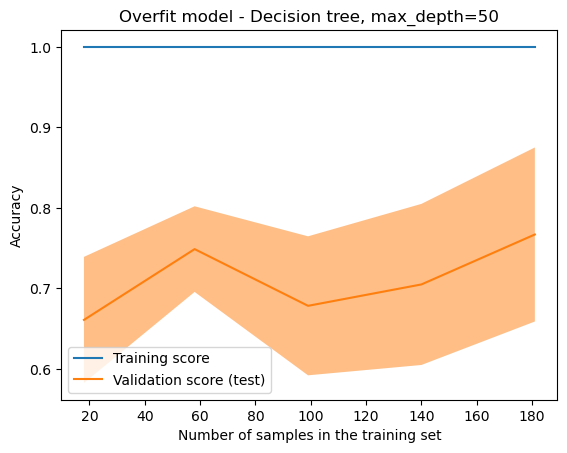

In [7]:
# Overfit model
# Train a decision tree with max_depth=10
tree_clf=DecisionTreeClassifier(max_depth=50)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
plot_learning_curve(tree_clf, "Overfit model - Decision tree, max_depth=50", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))



## Random forests classifier learning curves

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    scaler=StandardScaler()
    X_norm = scaler.fit_transform(X)
    estimator.fit(X_norm, y)
    train_size_abs, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, 
                                                            cv=cv, scoring='accuracy', n_jobs=n_jobs)
    LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
    plt.legend(['Training score', 'Validation score (test)'])
    plt.title(title)
    plt.ylim(ylim)
    plt.show()


df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
# plot_learning_curve(forest_clf, "Random forest, n_estimators=100, max_depth=None", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

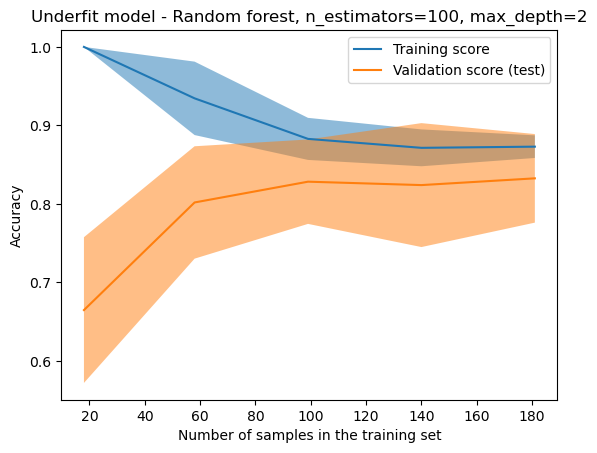

In [9]:
# Underfit model
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
plot_learning_curve(forest_clf, "Underfit model - Random forest, n_estimators=100, max_depth=2", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

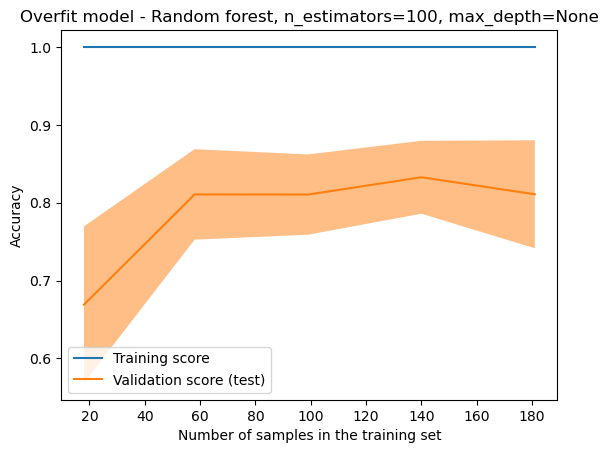

In [10]:
# Overfit model
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
plot_learning_curve(forest_clf, "Overfit model - Random forest, n_estimators=100, max_depth=None", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

In [11]:
#https://stackabuse.com/understanding-svm-hyperparameters/
#C et gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    scaler=StandardScaler()
    X_norm = scaler.fit_transform(X)
    estimator.fit(X_norm, y)
    train_size_abs, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, 
                                                            cv=cv, scoring='accuracy', n_jobs=n_jobs)
    LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
    plt.legend(['Training score', 'Validation score (test)'])
    plt.title(title)
    plt.ylim(ylim)
    plt.show()


df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# svc_clf = SVC(C=1, gamma='auto')
# plot_learning_curve(svc_clf, "SVM SVC, C=1, gamma=auto", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

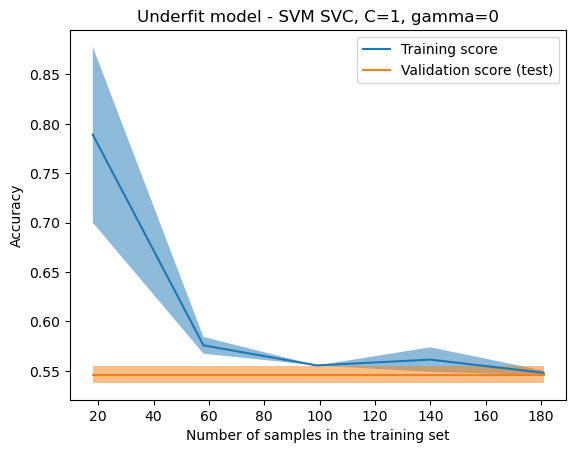

In [14]:
# Underfit model?
svc_clf = SVC(C=1, gamma=0)
plot_learning_curve(svc_clf, "Underfit model - SVM SVC, C=1, gamma=0", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

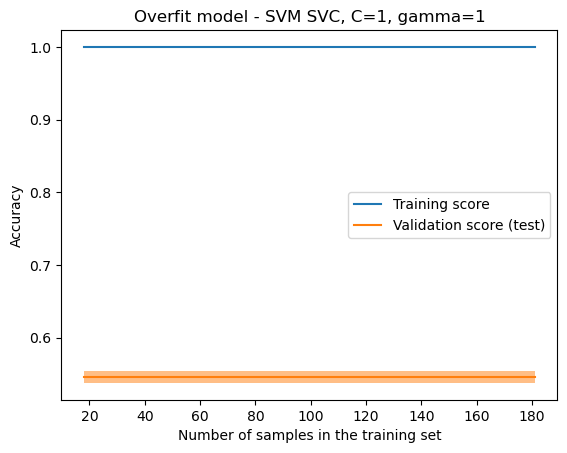

In [16]:
# Overfit model?
svc_clf = SVC(C=1, gamma=1)
plot_learning_curve(svc_clf, "Overfit model - SVM SVC, C=1, gamma=1", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


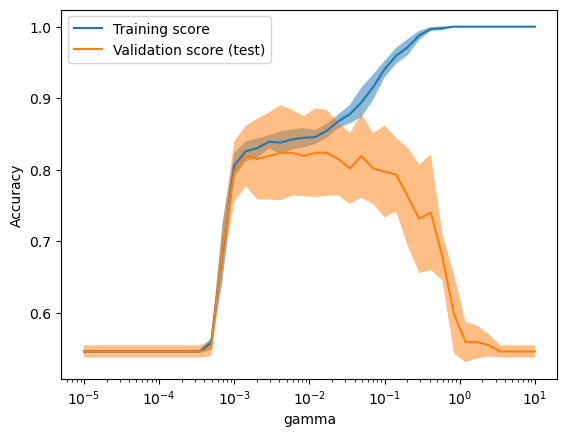

In [81]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ValidationCurveDisplay

def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    pass

df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
svc_clf = SVC(C=1)

train_scores, test_scores = validation_curve(svc_clf, X_train_norm, y_train, param_name='gamma',param_range=np.logspace(-5,np.log10(10),40), scoring='accuracy')
ValidationCurveDisplay(param_name='gamma', param_range=np.logspace(-5,np.log10(10),40), 
                       train_scores=train_scores, test_scores=test_scores, score_name="Accuracy").plot()
plt.legend(['Training score', 'Validation score (test)'])
plt.show()

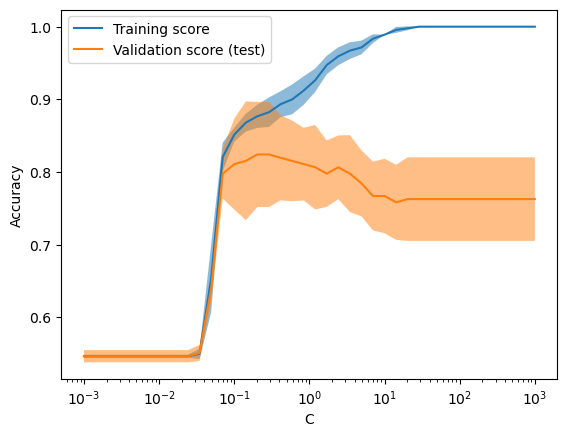

In [86]:
df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
# forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
svc_clf = SVC()

param_range=np.logspace(-3, 3, 40)

train_scores, test_scores = validation_curve(svc_clf, X_train_norm, y_train,param_name='C',param_range=param_range, scoring='accuracy')
ValidationCurveDisplay(param_name='C', param_range=param_range, 
                       train_scores=train_scores, test_scores=test_scores, score_name="Accuracy").plot()
plt.legend(['Training score', 'Validation score (test)'])
plt.show()

In [54]:
len(X_train_norm)

227

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves

In [87]:
from sklearn.model_selection import GridSearchCV

df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)f, axes = plt.subplots(4,3,figsize=(17,13), sharex=False)
for i, feature in enumerate(df_cat_var_list):
    sns.countplot(data=df, x=feature, ax=axes[i%4, i//4])
    axes[i%4, i//4].tick_params(axis='x', labelrotation = 45)
    
plt.tight_layout()
plt.show()
                         'C':np.logspace(-3,3,40), 
                         'gamma':np.logspace(-5,np.log10(10),40)}
svc = SVC()

grid_search = GridSearchCV(svc, 
                           parameters_dictionary, 
                           scoring = 'accuracy',
                           return_train_score=True, 
                           cv = 5,
                           verbose = 1,
                           n_jobs=-1) # Displays how many combinations of parameters and folds we'll have, for more information as the time to run each search, use 2 or 3 values instead of 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.42510267e-03, 2.03091762e-03, 2.89426612e-03,
       4.12462638e-03, 5.87801607e-03, 8.37677640e-03, 1.19377664e-02,
       1.70125428e-02, 2.42446202e-02, 3.45510729e-02, 4.92388263e-02,
       7.01703829e-02, 1.00000000e-01, 1.42510267e-01, 2.03091762e-01,
       2.89426612e-01, 4.12462638e-01, 5.87801607e-0...
       1.19377664e-02, 1.70125428e-02, 2.42446202e-02, 3.45510729e-02,
       4.92388263e-02, 7.01703829e-02, 1.00000000e-01, 1.42510267e-01,
       2.03091762e-01, 2.89426612e-01, 4.12462638e-01, 5.87801607e-01,
       8.37677640e-01, 1.19377664e+00, 1.70125428e+00, 2.42446202e+00,
       3.45510729e+00, 4.92388263e+00, 7.01703829e+00, 1.00000000e+01]),
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [88]:
grid_search.best_estimator_ #best model

SVC(C=492.3882631706742, gamma=1.4251026703029991e-05)

In [93]:
grid_search.best_params_['C'] #best param
best_c = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

In [94]:
grid_search.best_score_ #best score

0.8272727272727274

In [95]:
test = pd.DataFrame(
    grid_search.cv_results_
    
).assign(param_gamma=lambda df : [np.log(df['param_gamma'][row]) for row in df.index.values ] )
test 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014871,0.001200,0.005797,0.000819,0.001,-11.512925,rbf,"{'C': 0.001, 'gamma': 9.999999999999999e-06, '...",0.545455,0.545455,...,0.544108,0.006851,679,0.543779,0.543779,0.545872,0.545872,0.541284,0.544117,0.001698
1,0.013584,0.001719,0.004941,0.000125,0.001,-11.158682,rbf,"{'C': 0.001, 'gamma': 1.4251026703029991e-05, ...",0.545455,0.545455,...,0.544108,0.006851,679,0.543779,0.543779,0.545872,0.545872,0.541284,0.544117,0.001698
2,0.012840,0.001866,0.005783,0.001275,0.001,-10.804438,rbf,"{'C': 0.001, 'gamma': 2.0309176209047348e-05, ...",0.545455,0.545455,...,0.544108,0.006851,679,0.543779,0.543779,0.545872,0.545872,0.541284,0.544117,0.001698
3,0.013419,0.001024,0.005677,0.001391,0.001,-10.450194,rbf,"{'C': 0.001, 'gamma': 2.8942661247167517e-05, ...",0.545455,0.545455,...,0.544108,0.006851,679,0.543779,0.543779,0.545872,0.545872,0.541284,0.544117,0.001698
4,0.012857,0.001230,0.005164,0.000982,0.001,-10.095950,rbf,"{'C': 0.001, 'gamma': 4.124626382901348e-05, '...",0.545455,0.545455,...,0.544108,0.006851,679,0.543779,0.543779,0.545872,0.545872,0.541284,0.544117,0.001698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.014231,0.001671,0.004869,0.000497,1000.0,0.885610,rbf,"{'C': 1000.0, 'gamma': 2.424462017082331, 'ker...",0.545455,0.545455,...,0.544108,0.006851,679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1596,0.014549,0.001862,0.004975,0.000693,1000.0,1.239854,rbf,"{'C': 1000.0, 'gamma': 3.455107294592218, 'ker...",0.545455,0.545455,...,0.544108,0.006851,679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1597,0.013702,0.000815,0.004972,0.000700,1000.0,1.594097,rbf,"{'C': 1000.0, 'gamma': 4.923882631706741, 'ker...",0.545455,0.545455,...,0.544108,0.006851,679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1598,0.014743,0.001351,0.005110,0.000757,1000.0,1.948341,rbf,"{'C': 1000.0, 'gamma': 7.017038286703836, 'ker...",0.545455,0.545455,...,0.544108,0.006851,679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


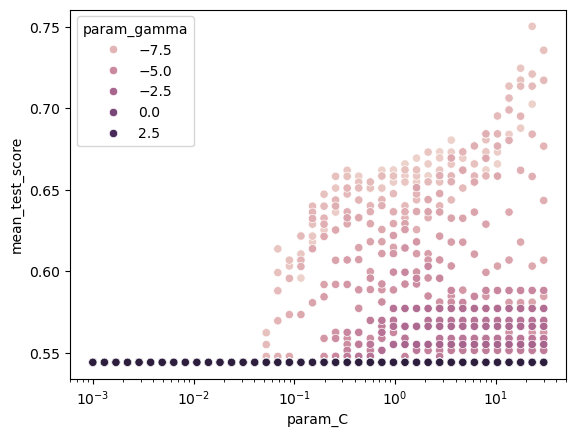

In [77]:

fig, ax = plt.subplots()
sns.scatterplot(data=test, x='param_C', y='mean_test_score', hue='param_gamma', ax=ax)
ax.set_xscale("log")

#### SVM Learning curve + validation curve 

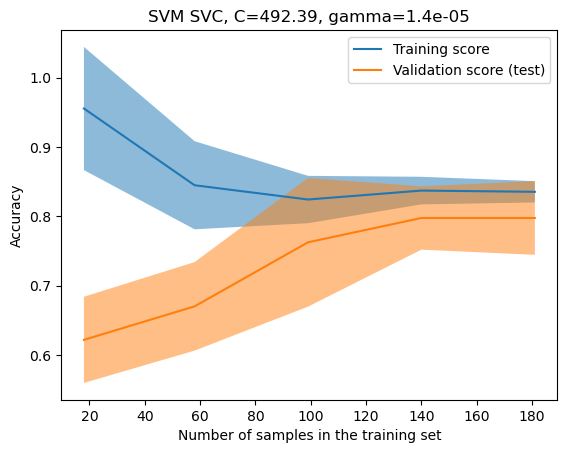

In [100]:
# Good fit ?
#https://stackabuse.com/understanding-svm-hyperparameters/
#C et gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    scaler=StandardScaler()
    X_norm = scaler.fit_transform(X)
    estimator.fit(X_norm, y)
    train_size_abs, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, 
                                                            cv=cv, scoring='accuracy', n_jobs=n_jobs)
    LearningCurveDisplay(train_sizes=train_size_abs, train_scores = train_scores, test_scores=test_scores, score_name="Accuracy").plot()
    plt.legend(['Training score', 'Validation score (test)'])
    plt.title(title)
    plt.ylim(ylim)
    plt.show()


df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(columns='target')
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)


svc_clf = SVC(C=best_c, gamma=best_gamma)
plot_learning_curve(svc_clf, f"SVM SVC, C={round(best_c,2)}, gamma={round(best_gamma,6)}", X=X_train_norm, y=y_train, train_sizes=np.linspace(.1, 1.0, 5))